# Stock Prediction using Stocker

Stocker was developed for both stock analysis and prediction. Analysis is mostly concerned with looking at past data, and prediction is using the past data to make estimates for the future. This notebook will document some of the basic capabilities of Stocker for prediction. I must recommend against any investing in the stock market, with or without Stocker! Mostly I made this tool because I wanted to get some experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see usage for analysis, look at the Stocker Analysis Usage notebook. 

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

## Import the Stocker Class

In [2]:
from stocker import Stocker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we simply need to pass the correct ticker to the stocker class and assign it to a variable. 

In [3]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-01-17.


### Basic Plot of Stock History

Maximum Adj. Close = 1305.20 on 2018-01-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1295.00.



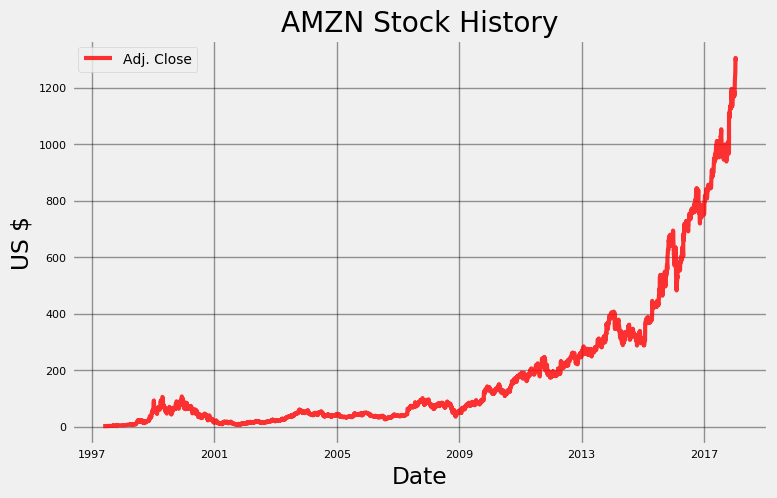

In [4]:
amazon.plot_stock()

## Create Model to Examine Trends

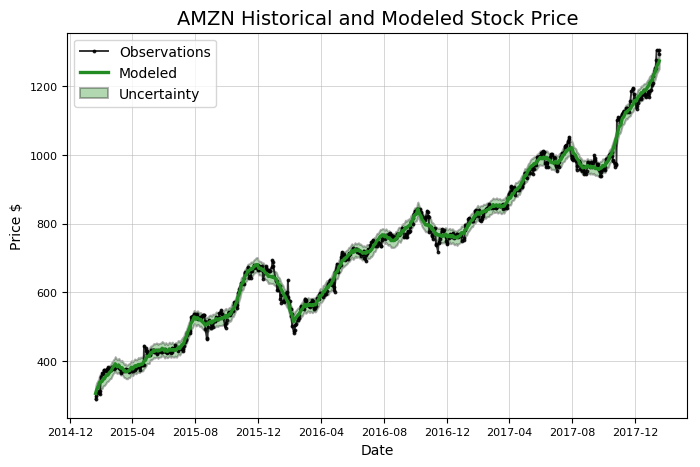

In [5]:
model, model_data = amazon.create_prophet_model()

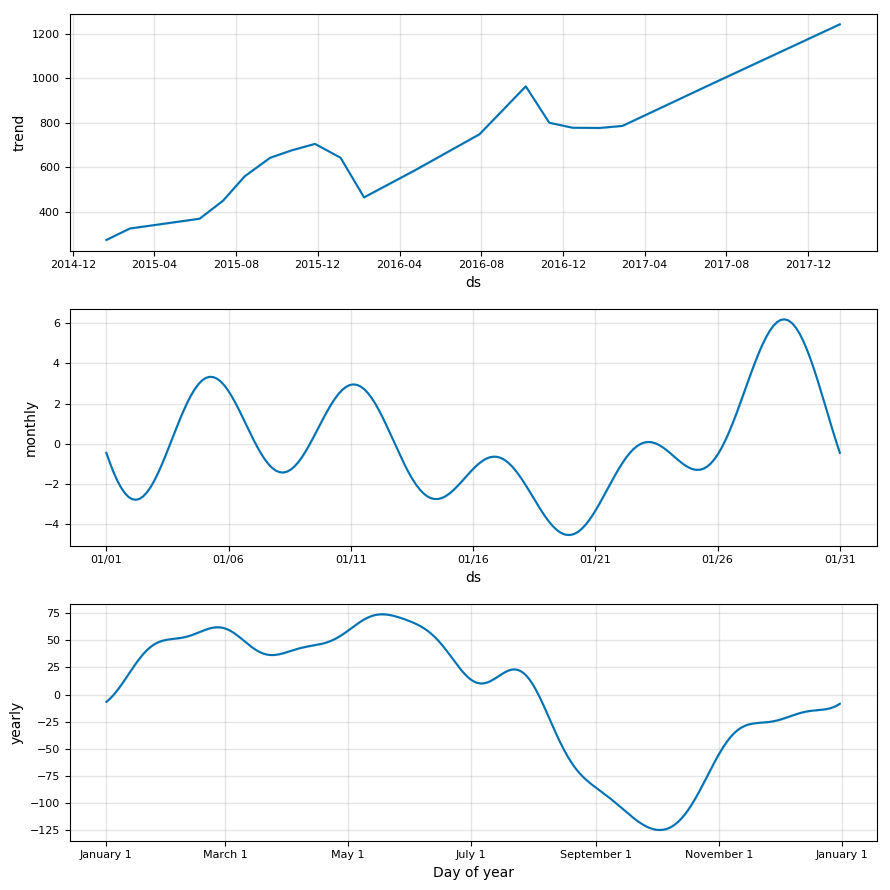

In [8]:
model.plot_components(model_data)
plt.show()

# Changepoint Prior Scale Selection

## Graphical Comparison

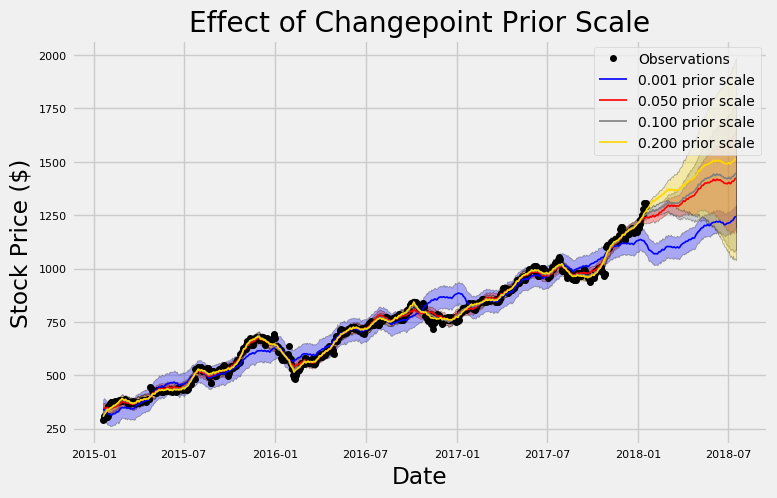

In [9]:
amazon.changepoint_prior_analysis()

## Quantitative Comparison

     cps  train_err  train_range    test_err  test_range
0  0.001  51.259184   142.893651  106.658964  142.973302
1  0.050  18.021190    59.170884  185.658620  249.825844
2  0.100  14.072377    46.339695   74.910173  494.350017
3  0.200  12.036044    40.243709   58.526239  876.509543


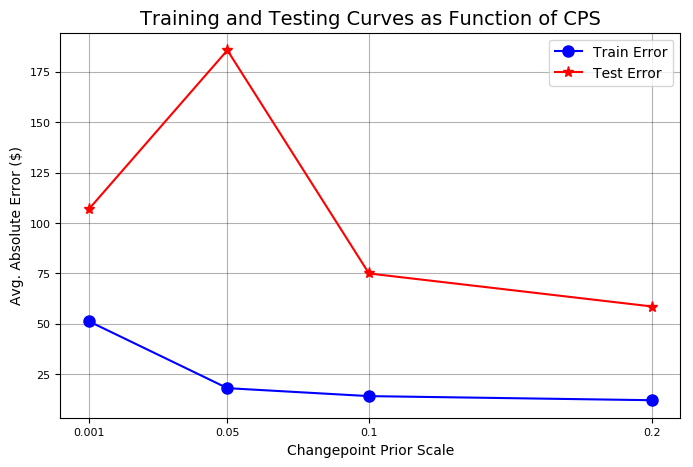

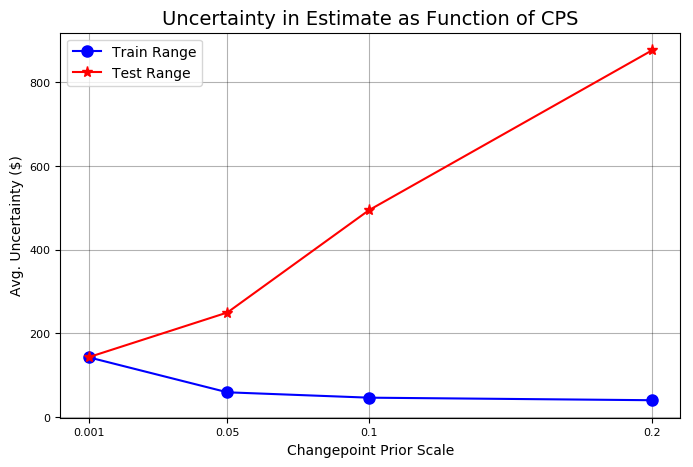

In [10]:
amazon.changepoint_prior_validation()

### Refine Search 

   cps  train_err  train_range   test_err   test_range
0  0.2  12.036044    40.310823  58.526239   883.359199
1  0.3  10.796378    36.654202  77.077805  1329.044578
2  0.4  10.478304    35.750494  73.550397  1413.427084
3  0.5  10.318233    35.313771  81.205088  1501.935009


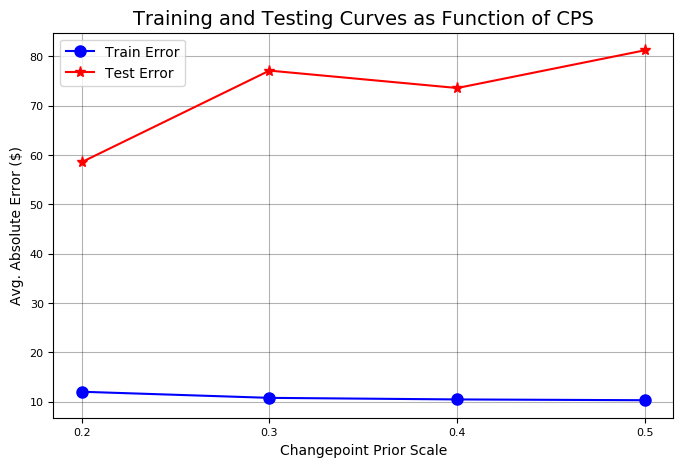

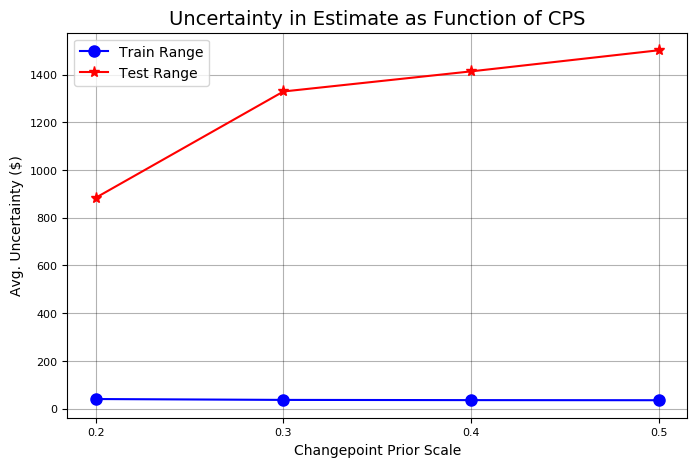

In [11]:
amazon.changepoint_prior_validation(changepoint_priors=[0.2, 0.3, 0.4, 0.5])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. 

In [12]:
amazon.changepoint_prior_scale = 0.2

Predicted Price on 2019-01-17 = $1785.51


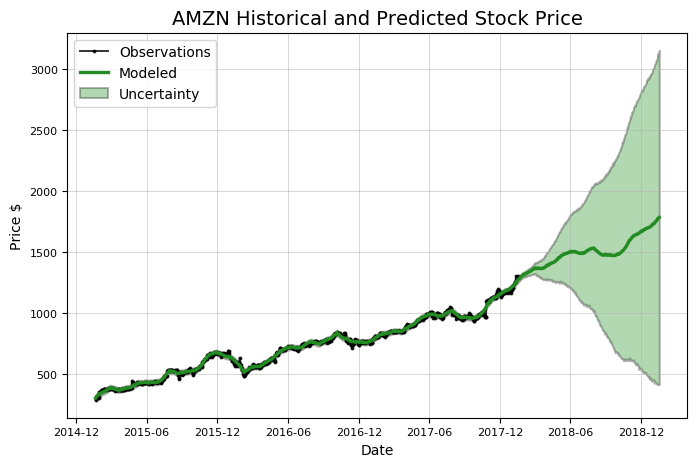

In [15]:
model, model_data = amazon.create_prophet_model(days=365)

# Evaluate Predictions

You played the stock market in AMZN from 2017-01-17 to 2018-01-17 with 1000 shares.

Predicted price on 2018-01-13 = $1063.23.
Actual price on    2018-01-12 = $1305.20.

When the model predicted an increase, the price increased 58.75% of the time.
When the model predicted a decrease, the price decreased  46.59% of the time.

The total profit using the Prophet model = $346760.00.
The Buy and Hold strategy profit =         $495480.00.

Thanks for playing the stock market!



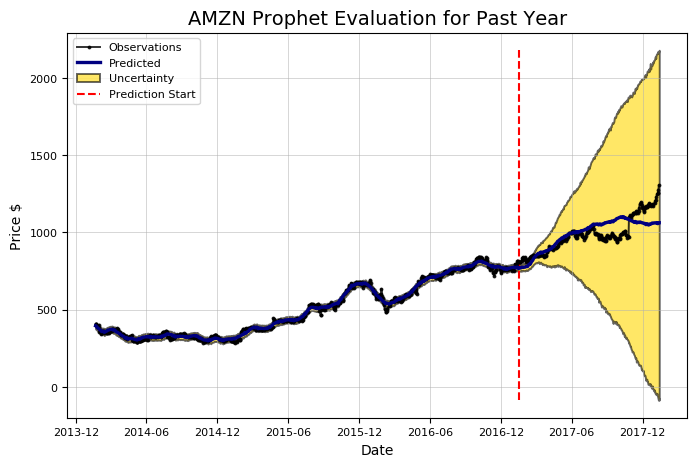

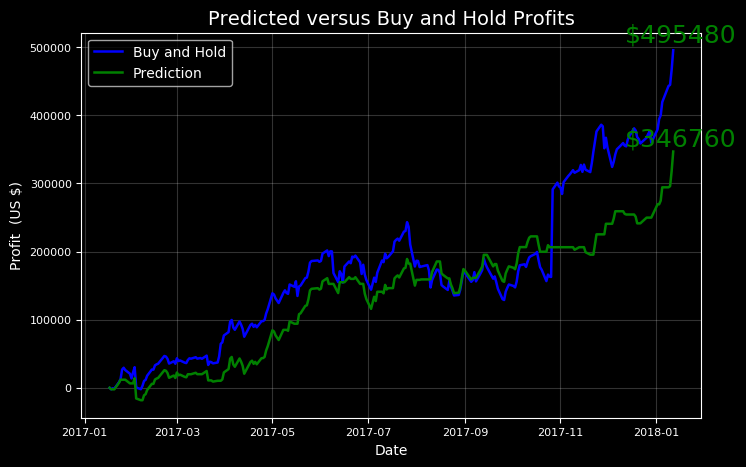

In [14]:
amazon.evaluate_prediction()


Predicted Increase: 

        Date     estimate    change        upper        lower
1 2018-01-18  1278.502080  4.753842  1297.631202  1257.231797
2 2018-01-19  1281.544223  3.042143  1302.891296  1261.249894
4 2018-01-21  1285.266498  3.722276  1305.202973  1266.009012
5 2018-01-22  1289.023267  3.756769  1308.398305  1270.369117
6 2018-01-23  1294.058790  5.035523  1313.228834  1274.496015
7 2018-01-24  1298.597146  4.538356  1319.355220  1277.497767
8 2018-01-25  1301.344414  2.747268  1322.366683  1282.164793
9 2018-01-26  1302.865237  1.520823  1324.940361  1282.636472

Predicted Decrease: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []


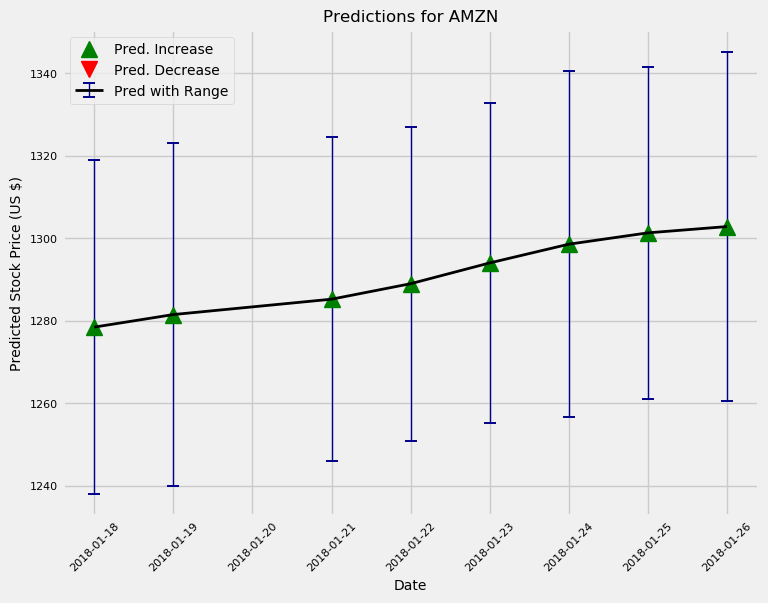

In [16]:
amazon.predict_future(days=10)


Predicted Increase: 

          Date     estimate    change        upper        lower
1   2018-01-18  1278.502080  4.753842  1298.515278  1258.898348
2   2018-01-19  1281.544223  3.042143  1300.768365  1259.555653
4   2018-01-21  1285.266498  3.722276  1306.386040  1265.021568
5   2018-01-22  1289.023267  3.756769  1310.072020  1270.031832
6   2018-01-23  1294.058790  5.035523  1312.784562  1274.518346
7   2018-01-24  1298.597146  4.538356  1319.062276  1279.077670
8   2018-01-25  1301.344414  2.747268  1321.557817  1281.128865
9   2018-01-26  1302.865237  1.520823  1324.223659  1281.928956
11  2018-01-28  1309.227304  6.362067  1328.829638  1288.453827
12  2018-01-29  1314.485117  5.257813  1334.694148  1293.881288
13  2018-01-30  1318.391692  3.906575  1342.009000  1297.926716
14  2018-01-31  1319.110478  0.718786  1340.369075  1298.706501
18  2018-02-04  1320.220453  4.719252  1343.163153  1296.249427
19  2018-02-05  1324.680390  4.459937  1348.724511  1300.980879
20  2018-02-06  1

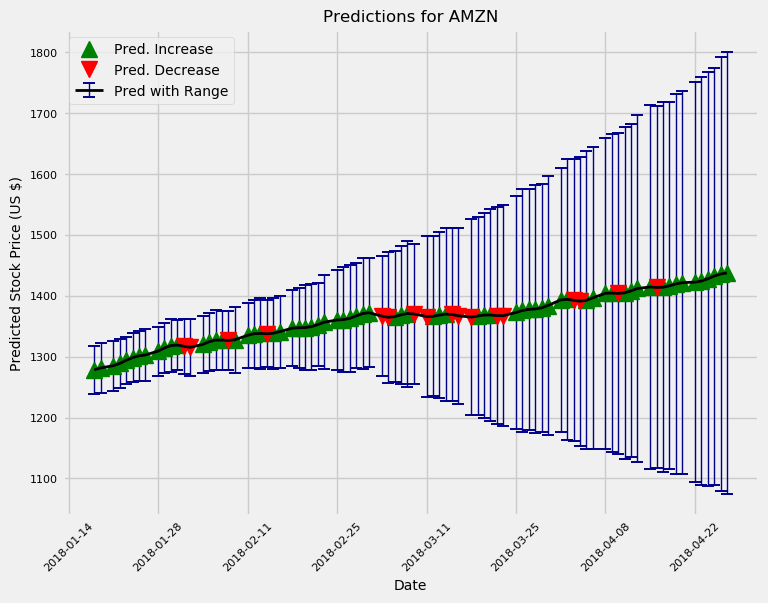

In [17]:
amazon.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasts have some uncertainty, and the next forecasts are made on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 